In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
data=pd.read_csv("FuelConsumptionCo2.csv")

In [36]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [38]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [39]:
data.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

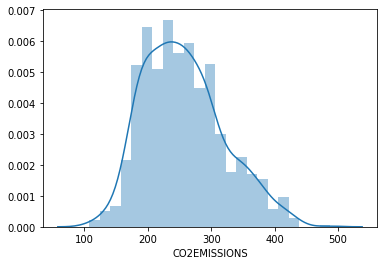

In [40]:
sns.distplot(data['CO2EMISSIONS'])

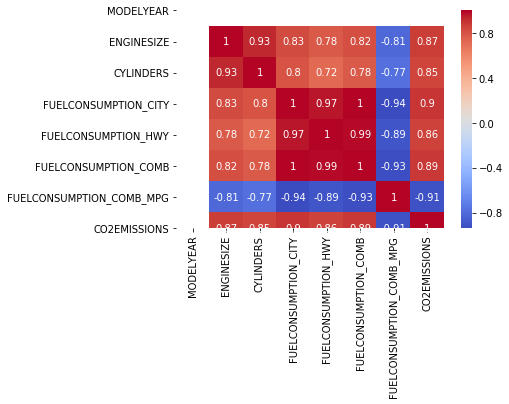

In [41]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

In [54]:
x=data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       ]]
x

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
0,2.0,4,9.9,6.7,8.5
1,2.4,4,11.2,7.7,9.6
2,1.5,4,6.0,5.8,5.9
3,3.5,6,12.7,9.1,11.1
4,3.5,6,12.1,8.7,10.6
...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8
1063,3.2,6,13.2,9.5,11.5
1064,3.0,6,13.4,9.8,11.8
1065,3.2,6,12.9,9.3,11.3


In [43]:
y=data[['CO2EMISSIONS']]

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [45]:
#fitting the model for training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
#predicting the test results
y_predict=regressor.predict(x_test)

In [47]:
#predicting the test set results
y_predict

array([[334.35815159],
       [210.23589881],
       [217.67592964],
       [229.08324737],
       [195.45223268],
       [296.80542033],
       [210.4500467 ],
       [264.95577211],
       [207.5261927 ],
       [319.944612  ],
       [279.62601896],
       [381.88851153],
       [225.23495546],
       [291.10435087],
       [184.9290531 ],
       [278.8753348 ],
       [348.60870888],
       [205.38825307],
       [253.54561256],
       [378.95098175],
       [196.01982035],
       [230.87260001],
       [251.11323065],
       [218.36953292],
       [181.05931003],
       [260.78452318],
       [267.43863965],
       [358.20788189],
       [291.88522374],
       [166.75067784],
       [336.67711422],
       [222.98192257],
       [283.78500855],
       [243.10638049],
       [196.01982035],
       [195.02003518],
       [311.91988137],
       [213.6764235 ],
       [223.97737467],
       [250.01253414],
       [192.62102677],
       [192.20926348],
       [206.9463457 ],
       [187

In [48]:
y_test

,CO2EMISSIONS
766,356
204,209
629,230
897,212
711,168
...,...
822,198
1029,221
798,191
803,184


In [49]:
from sklearn import metrics

In [50]:
metrics.r2_score(y_test,y_predict)

0.860082975569795

In [51]:
print("MAE:",metrics.mean_absolute_error(y_test,y_predict))

MAE: 18.02420746236804


In [52]:
print("MsE:",metrics.mean_squared_error(y_test,y_predict))

MsE: 590.657686908352


In [53]:
print("RMsE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

RMsE: 24.30345010298645


In [56]:
regressor.predict([[3.5,6,12.7,9.1,11.1]])

array([[256.31849497]])